In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
cd ../gdrive/My Drive/Colab Notebooks/_Image Processing

# Classify ImageNet classes with ResNet50

In [ ]:
import tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
model = ResNet50(weights='imagenet')

print(model.summary())

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

## Cat prediction

In [ ]:
from skimage import data
cat = data.chelsea() # cat
cat.shape

(300, 451, 3)

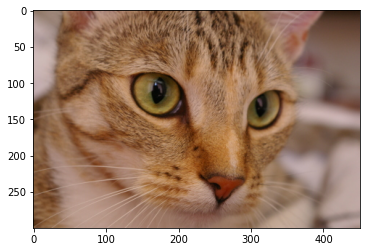

In [ ]:
plt.imshow(cat)

In [ ]:
cat.shape

(300, 451, 3)

In [ ]:
import cv2 as cv

img = cat.copy()

img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # changing BGR to RGB to show images in true colors
img=cv.resize(img,(254, 254)) # shape it for the ResNet50
print(img.shape)

(254, 254, 3)


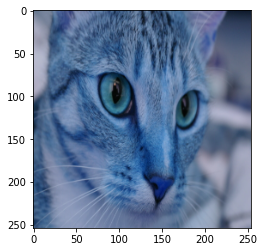

In [ ]:
plt.imshow(img)

In [ ]:
x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

In [ ]:
preds = model.predict(x)
preds.shape

(1, 1000)

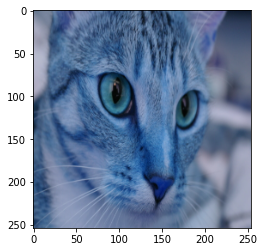

In [ ]:
plt.imshow(img)

In [ ]:
final_prediction = decode_predictions(preds, top=5) #Can also look at top k results. 

49152/35363 [=========================================] - 0s 0us/step


In [ ]:
final_prediction

[[('n02124075', 'Egyptian_cat', 0.96759206),
  ('n02127052', 'lynx', 0.018996347),
  ('n02123159', 'tiger_cat', 0.006597385),
  ('n02123045', 'tabby', 0.0037918633),
  ('n04209133', 'shower_cap', 0.0008080722)]]

In [ ]:
print("The object in the image is: ", final_prediction[0][0][1])
print("with a confidence of ", final_prediction[0][0][2])

The object in the image is:  Egyptian_cat
with a confidence of  0.96759206


## Second prediction

(400, 600, 3)
(254, 254, 3)
[[('n07920052', 'espresso', 0.38167396), ('n07930864', 'cup', 0.061662767), ('n04476259', 'tray', 0.05898921), ('n03764736', 'milk_can', 0.033718605), ('n04557648', 'water_bottle', 0.032905348)]]


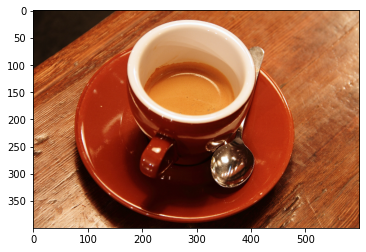

In [ ]:
from skimage import data
import cv2 as cv

cat = data.coffee() # cat
print(cat.shape) # original shape
plt.imshow(cat)

img = cat.copy()

img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # changing BGR to RGB to show images in true colors
img=cv.resize(img,(254, 254)) # shape it for the ResNet50
print(img.shape)


# getting image to Model ready
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


preds = model.predict(x)
print(preds.shape)

In [ ]:
final_prediction = decode_predictions(preds, top=5) #Can also look at top k results. 
final_prediction

[[('n07920052', 'espresso', 0.38167396),
  ('n07930864', 'cup', 0.061662767),
  ('n04476259', 'tray', 0.05898921),
  ('n03764736', 'milk_can', 0.033718605),
  ('n04557648', 'water_bottle', 0.032905348)]]

In [ ]:
print("The object in the image is: ", final_prediction[0][0][1])
print("with a confidence of ", final_prediction[0][0][2])

The object in the image is:  espresso
with a confidence of  0.38167396


## Prediction on variable images

(512, 512)
(254, 254, 3)
(1, 1000)


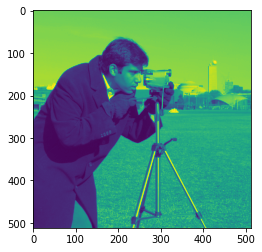

In [ ]:
from skimage import data
import cv2 as cv

cat = data.camera() # cat
print(cat.shape) # original shape
plt.imshow(cat)

img = cat.copy()

img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # changing BGR to RGB to show images in true colors
img=cv.resize(img,(254, 254)) # shape it for the ResNet50
print(img.shape)


# getting image to Model ready
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


preds = model.predict(x)
print(preds.shape)

In [ ]:
final_prediction = decode_predictions(preds, top=5) #Can also look at top k results. 
final_prediction

[[('n04485082', 'tripod', 0.95558506),
  ('n02841315', 'binoculars', 0.028950328),
  ('n04069434', 'reflex_camera', 0.0056871152),
  ('n03494278', 'harmonica', 0.002036305),
  ('n04090263', 'rifle', 0.0018156633)]]

In [ ]:
print("The object in the image is: ", final_prediction[0][0][1])
print("with a confidence of ", final_prediction[0][0][2])

The object in the image is:  tripod
with a confidence of  0.95558506
